In [65]:
#let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #scaling dataset

## all models/aglorithm for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data file from folder
data = pd.read_csv('/config/workspace/Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## for EDA
data.describe()

## if we had any categorical variable column then we would use OneHot-encoding, ordinal-encoding or target-guided encoding
## for now we mostly have numerical column

### we can see minimum values as 0, but it can't be real,like gulcose can nerver be 0 of any person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()
## no null value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible, right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [5]:
## trying to get all 0 values of these particular columns

if (data['BMI']==0).all():
    print('all')

In [6]:
if (data['BMI']==0).any():
    print('any')

any


In [7]:
if (data==0).any(axis=1):

SyntaxError: unexpected EOF while parsing (3582611566.py, line 1)

In [8]:
data.where(data==0).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
data[ (data['BloodPressure']==0).all()]

KeyError: False

In [10]:

data[(data==0).any(axis=1)] ## outcome column is also returning

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
## have to add paranthesis 
data[data['Glucose']==0 | data['BloodPressure']==0 | data['SkinThickness']==0 | data['Insulin']==0 | data['BMI']==0]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [14]:

data[(data['Glucose']==0) | (data['BloodPressure']==0) | (data['SkinThickness']==0) | (data['Insulin']==0) | (data['BMI']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:

data[(data['Glucose']==0) | (data['BloodPressure']==0) | (data['SkinThickness']==0) | (data['Insulin']==0) | (data['BMI']==0)].shape

(376, 9)

In [20]:
## so many rows have 0 (50% rows), we'll replace it with mean or median(if distribution have outlier)
data.shape

(768, 9)

<Axes: >

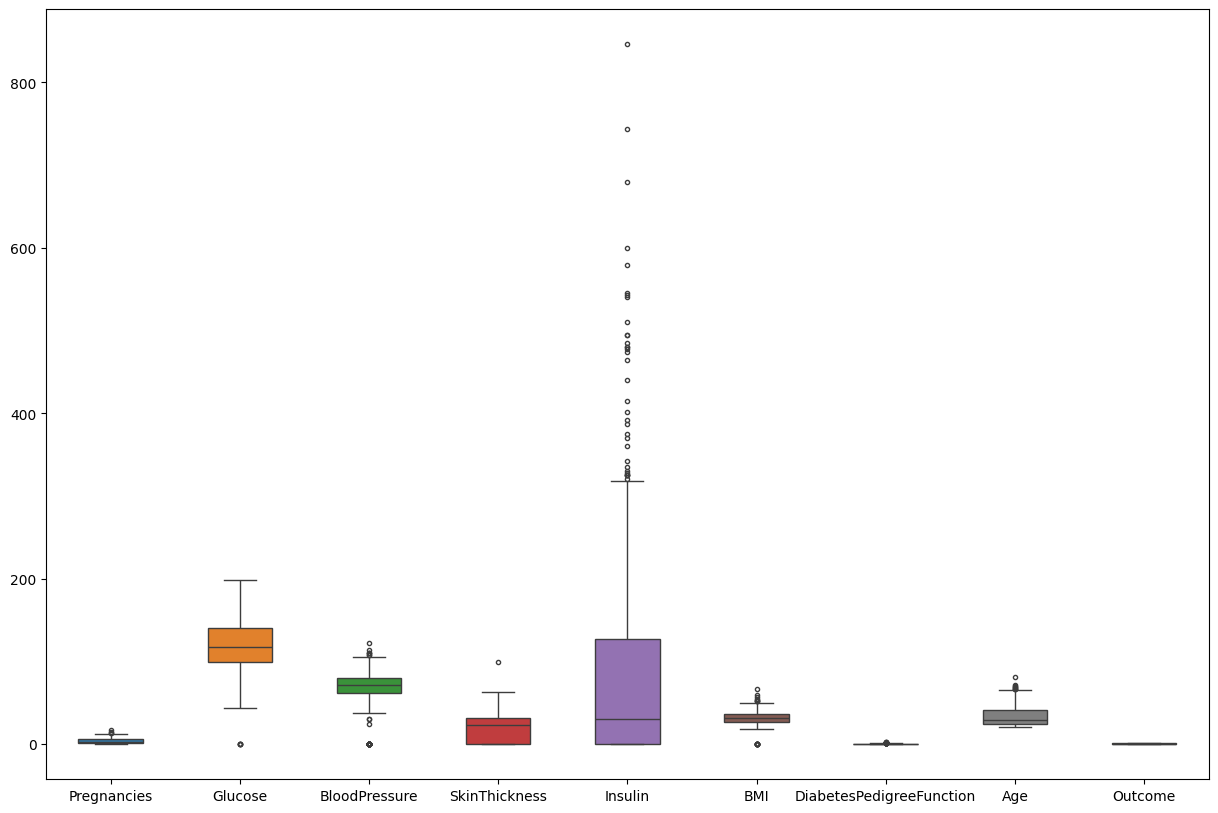

In [23]:
##there are outliers present in some columns.
# lets visualize
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width=0.5, ax=ax, fliersize=3)

In [30]:
print(data['Insulin'].mean())
print(data.Insulin.median())
## 79 insulin is under normal

79.79947916666667
30.5


<Axes: ylabel='Insulin'>

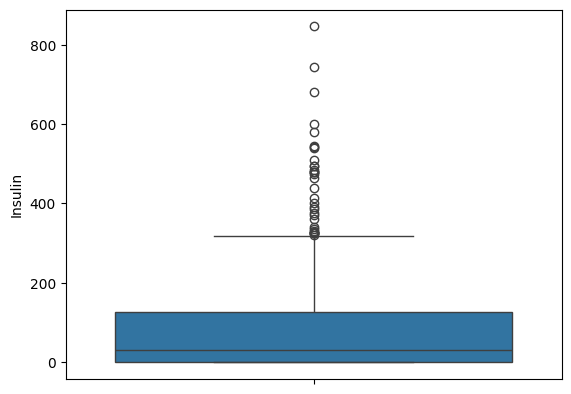

In [29]:
sns.boxplot(data=data.Insulin)

In [31]:
# here few misconception is, there like BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets
## try to
## now replacing zero values with the mean of the column
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [33]:
data[(data['Glucose']==0) | (data['BloodPressure']==0) | (data['SkinThickness']==0) | (data['Insulin']==0) | (data['BMI']==0)]
## removed all 0 value from these columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [38]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [35]:
#segregate the dependent and independent variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [42]:
## seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

since we have lot of outliers we can do standard scaling
bring all mean=0 and standard_deviation=1 (using z-score)

In [43]:
import pickle
## Standard Scaling - Standardization
def scaler_standard(X_train,X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = open('/config/workspace/Model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [46]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [47]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [41]:
## ignore warning because of some deprecated function
import warnings
warnings.filterwarnings('ignore')

#### Logistic Regression Model Training With Hyperparameter Tuning


In [48]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np

In [110]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [111]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds

clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [112]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [113]:
clf.best_score_

0.7725487256371812

In [134]:
## we can directly use clf() for prediction
## but for now again instantiating logisticRegression
## with best_params_ (best combination of parameters from GridSearchCV)
log_clf = LogisticRegression(C= 1.0, penalty='l1', solver='liblinear') ##can usepenalty ='l2' because on other project it was given better recall
log_clf.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

#### Decision Tree Model Training With Hyperparameter Tuning

In [54]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

- verbose is the verbosity: the higher, the more messages; in this case, it is set to 3.
- cv is the cross-validation generator or an iterable, in this case, there is a 3-fold cross-validation

In [57]:
dtclassifier = DecisionTreeClassifier()
clf=GridSearchCV(dtclassifier,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)

clf.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.583 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, sco

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [58]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [59]:
## passing best parameter to DTC, we can even use above clf() to predict directly
dt_clf = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 4,
 max_features= 'log2',
 splitter= 'random')
 
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       splitter='random')

#### Support Vector Classifier With Hyperparameter Tuning

In [60]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [62]:
## directly passing classifier in GridSearchCV
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3,scoring='accuracy')

grid.fit(X_train,y_train)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.2s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.2s
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/2] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.2s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.740 total time=   0.2s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/2] END .C=0.1, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/2] END .C=0.1, gamma=0.1, kernel=polynomia

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [63]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [64]:
svc_clf=SVC(C=0.1,gamma=1,kernel='linear')
svc_clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

#### Naive Baye's Implementation

In [ ]:
## hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

- var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.

- Why this step: To set the selected parameters used to find the optimal combination.

In [ ]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=2, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

- verbose is the verbosity: the higher, the more messages; in this case, it is set to 1.
- cv is the cross-validation generator or an iterable, in this case, there is a 2-fold cross-validation
- n_jobs is the maximum number of concurrently running workers; in this case, it is set to -1 which implies that all CPUs are used.

In [66]:
## directly using Gaussian Naive bayes with Hyperparameter Tuning
gnb = GaussianNB()

In [67]:
gnb.fit(X_train,y_train)

GaussianNB()

let's see how well our model performs on the test data set.

In [135]:
## Logistic Regression prediction
y_pred_logre = log_clf.predict(X_test_scaled)

In [69]:
## Decision Tree prediction
y_pred_dtc = dt_clf.predict(X_test_scaled)

In [70]:
## Support Vector Classifier prediction
y_pred_svc = svc_clf.predict(X_test_scaled)

In [71]:
## Gaussian Naive Bayes prediction
y_pred_gnb = gnb.predict(X_test_scaled)

#### Confusion Matrix

In [116]:
## Logistic Regression confusion matrix
print(confusion_matrix(y_pred_logre,y_test))

[[130  62]
 [  0   0]]


In [96]:
## Decision Tree confusion matrix
conf_mat_dtc = confusion_matrix(y_test,y_pred_dtc) ## doesn't matter in which order we write
## even if we calculate accuracy score manually and use confusion matrix, order of 'y_test' and 'y_pred'
## doesn't affect accuracy score result
conf_mat_dtc

array([[126,   4],
       [ 55,   7]])

In [77]:
## Support Vector Classifier confusion matrix
conf_mat = confusion_matrix(y_pred_svc,y_test)
conf_mat

array([[130,  62],
       [  0,   0]])

In [78]:
## Gaussian Naive Bayes confusion matrix
conf_mat = confusion_matrix(y_pred_gnb,y_test)
conf_mat

array([[127,  57],
       [  3,   5]])

#### Accuracy Score

In [128]:
## Logistic Regression accuracy score
accuracy_score(y_pred_logre,y_test)

0.6770833333333334

In [82]:
## Decision Tree accuracy score
accuracy_score(y_pred_dtc,y_test)

0.6927083333333334

In [83]:
## Support Vector Classifier accuracy score
accuracy_score(y_pred_svc,y_test)

0.6770833333333334

In [84]:
## Gaussian Naive Bayes accuracy score
print(accuracy_score(y_pred_gnb,y_test))

0.6875


#### manually calculating accuracy score of Decision Tree

In [97]:
true_positive = conf_mat_dtc[0][0]
false_positive = conf_mat_dtc[0][1]
false_negative = conf_mat_dtc[1][0]
true_negative = conf_mat_dtc[1][1]

In [98]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6927083333333334

In [99]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9692307692307692

In [107]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.6961325966850829

In [101]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8102893890675241

In [124]:
## or we can directly use this method to get all report
## for Decision Tree Classifier
from sklearn.metrics import classification_report
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       181
           1       0.11      0.64      0.19        11

    accuracy                           0.69       192
   macro avg       0.54      0.67      0.50       192
weighted avg       0.92      0.69      0.77       192



In [136]:
## Logistic Regression confusion matrix
conf_mat_log =confusion_matrix(y_pred_logre,y_test)
conf_mat_log

array([[130,  62],
       [  0,   0]])

In [137]:
true_positive = conf_mat_log[0][0]
false_positive = conf_mat_log[0][1]
false_negative = conf_mat_log[1][0]
true_negative = conf_mat_log[1][1]

In [142]:
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

In [143]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.6770833333333334

In [144]:
##for logistic Regression
print(classification_report(y_pred_logre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       192
           1       0.00      0.00      0.00         0

    accuracy                           0.68       192
   macro avg       0.50      0.34      0.40       192
weighted avg       1.00      0.68      0.81       192



- for diabetes Recall is important because our False-Negative is important
- if person have diabetes and result is showing Non-Diabetic then it's a blunder because may be he/she wouldn't re-do the test
- so False-Negative is important in this scenario

In [104]:
## using Decision Tree classifier model to save and use it on flask app
## because it's giving higher accuracy/ recall (false-negative)

import pickle
file = open('/config/workspace/Model/modelForPrediction.pkl','wb')
pickle.dump(dt_clf,file)
file.close()